In [25]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm

import xtrack as xt
import xobjects as xo
import xpart as xp


beta_rel = 0.305
#beta_rel = 0.106

gamma = 1.050
#gamma = 1.006


current=2.4
length = 1.5 # m cooler length
r_beam=25*1e-3

mass0=938.27208816*1e6 #ev/c^2

T_perp = 100e-3 # <E> [eV] = kb*T
T_l =  1e-3 # <E> [eV]
magnetic_field = 0.060 # T for AD
B_ratio=1e-10



c=299792458.0

p0c = mass0*beta_rel*gamma #eV/c



circumference = 182.43280000000 #m
T = circumference/(c*beta_rel)
s_per_turn = T


beta_x=10 
beta_y=4

#disp_x=0.12

                                        


Parameters: $I=2.4 A, B=0.060 T, \beta_x=10 m,\beta_y=4,D_x=0.12 m T_\perp=100meV,T_\parallel=1meV,\epsilon_{x}=35*1e-6,\epsilon_{y}=35*1e-6,dp/p=1e-3$

100%|██████████| 2/2 [01:31<00:00, 45.63s/it]


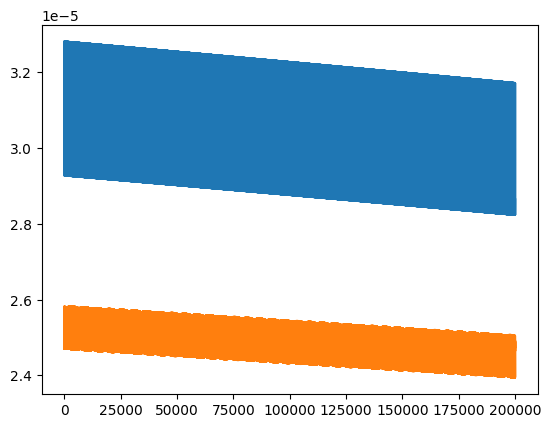

In [26]:
cooling_time=[]
num_particles=10

k_values=np.linspace(1e-6, 1e1, num=7)
#k_values=[1e-4,1e-3,1]
Ksq = 0.001
k_values=[0,Ksq]
for k in tqdm(k_values):


    disp_x=1
    

    arc=xt.LinearTransferMatrix(Q_x=5.44, Q_y=5.42,
                                beta_x_0=beta_x, beta_x_1=beta_x,
                                beta_y_0=beta_y,  beta_y_1=beta_y,
                                alpha_x_0=0,   alpha_x_1=0,
                                alpha_y_0=0,   alpha_y_1=0,
                                disp_x_0=disp_x,disp_x_1=disp_x,
                                disp_y_0=0,    disp_y_1=0,
                                beta_s=1*1e40,
                                Q_s=0,
                                chroma_x=0.0, chroma_y=0)

    emittance=5*1e-6 #inital emittance
    
    sigma_x = np.sqrt(beta_x*emittance)
    sigma_px = np.sqrt(emittance*1/beta_x)
    sigma_y = np.sqrt(beta_y*emittance)
    sigma_py = np.sqrt(emittance*1/beta_y)
    sigma_p = 5e-4


    delta = np.random.normal(loc=0.0, scale=sigma_p,  size=num_particles)
    x =     np.random.normal(loc=0.0, scale=sigma_x,  size=num_particles)+disp_x*delta
    px =    np.random.normal(loc=0.0, scale=sigma_px, size=num_particles)
    y =     np.random.normal(loc=0.0, scale=sigma_y,  size=num_particles)
    py =    np.random.normal(loc=0.0, scale=sigma_py, size=num_particles)
    
    particles = xp.Particles(
            
            mass0=mass0,
            p0c=p0c,
            x=x,
            px=px,
            y=y,
            py=py,
            delta=delta,
            zeta=0)
   
    cooler = xt.ElectronCooler(current=current,length=length,r_beam=r_beam,
                                            T_perp=T_perp,T_l=T_l,
                                            magnetic_field=magnetic_field,B_ratio=B_ratio,
                                            Neutralisation_space_charge=1)

    ########################
    #    Skew-quadrupole   #
    ########################

    Lsq = 1.0 # m
    Ksq = 0.001 # 1/m^2
    #Ksq = k # 1/m^2

    #Ksq = 0.00001 # 1/m^2

    #k  = np.sqrt(Ksq) # 1/m
    #kl = k*Lsq

    skew_quad=xt.Multipole(
                       ksl=[0,k],
                       length=Lsq
                       )    

    num_turns=int(2*1e5)
    num_turns=int(2*1e5)


    # initialize arrays
    x, px, delta, action_x = [], [], [], []
    action_x_big_list=[]
    
    cutoff=0.75
    # loop over turns
    for i in tqdm(range(num_turns), desc='Cooling Progress', leave=False):
        action_x_temp1 = (particles.x**2/beta_x + beta_x*particles.px**2)
        action_x_temp = np.percentile(action_x_temp1, 95)
        action_x.append(action_x_temp)
        # if action_x_temp < cutoff* action_x[0]:
        #             cooling_time.append(i*s_per_turn)
        #             break

        
        # track particle
        arc.track(particles)
        cooler.track(particles)
        skew_quad.track(particles)

    plt.plot(action_x)


    # if action_x_temp >= cutoff* action_x[0]:
    #     cooling_time.append(num_turns * s_per_turn)  # Append default value if cooling condition is not met
    # import math    
    # if math.isnan(action_x_temp):
    #     cooling_time.append(0)
    # # action_x_big_list.append(action_x)        
   

In [27]:
#particles.x
particles.px

array([ 2.21587516e-04,  4.32625380e-04, -5.55300647e-06, -3.94440144e-05,
       -1.55106842e-03, -1.97167737e-04,  1.29053993e-03,  1.22348061e-03,
       -8.00989643e-04,  8.19658355e-04])

ValueError: x and y must have same first dimension, but have shapes (2,) and (0,)

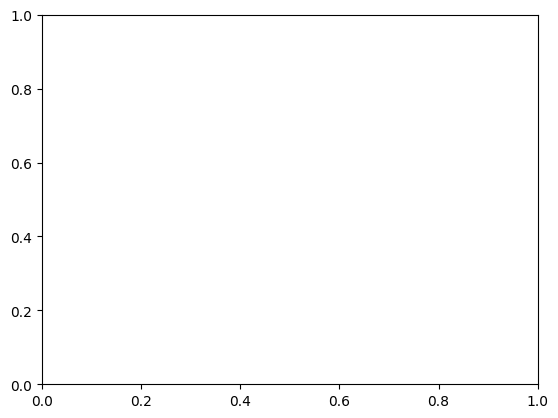

In [28]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.plot(k_values,cooling_time)
plt.xlabel(r'$k$ [m]')
plt.ylabel('cooling time [s]')
plt.title(r'cooling time vs k')
plt.show()
